In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
'''Importação dos dados, link de origem:
 https://dados.gov.br/dados/conjuntos-dados/taxas-dos-titulos-ofertados-pelo-tesouro-direto1
'''
data = pd.read_csv('PrecoTaxaTesouroDireto.csv', sep=';')



In [3]:
data.head(5)

,Tipo Titulo,Data Vencimento,Data Base,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
0,Tesouro IPCA+,15/08/2024,24/04/2018,"4,56","4,68","2318,97","2302,31","2301,68"
1,Tesouro Prefixado,01/01/2023,24/04/2018,"9,07","9,19","666,41","662,99","662,76"
2,Tesouro Prefixado com Juros Semestrais,01/01/2021,24/04/2018,"7,78","7,90","1081,56","1078,72","1078,40"
3,Tesouro Prefixado,01/01/2019,03/04/2018,"6,14","6,26","956,74","955,94","955,71"
4,Tesouro IPCA+ com Juros Semestrais,15/05/2035,03/04/2018,"5,00","5,12","3484,09","3440,37","3439,54"


In [4]:
data.columns

Index(['Tipo Titulo', 'Data Vencimento', 'Data Base', 'Taxa Compra Manha',
       'Taxa Venda Manha', 'PU Compra Manha', 'PU Venda Manha',
       'PU Base Manha'],
      dtype='object')

In [5]:
#Check formato dos dados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129701 entries, 0 to 129700
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Tipo Titulo        129701 non-null  object
 1   Data Vencimento    129701 non-null  object
 2   Data Base          129701 non-null  object
 3   Taxa Compra Manha  129701 non-null  object
 4   Taxa Venda Manha   129701 non-null  object
 5   PU Compra Manha    129701 non-null  object
 6   PU Venda Manha     129701 non-null  object
 7   PU Base Manha      129701 non-null  object
dtypes: object(8)
memory usage: 7.9+ MB


In [6]:
data.isnull().sum()

Tipo Titulo          0
Data Vencimento      0
Data Base            0
Taxa Compra Manha    0
Taxa Venda Manha     0
PU Compra Manha      0
PU Venda Manha       0
PU Base Manha        0
dtype: int64

In [7]:
data.groupby(['Tipo Titulo']).count().reset_index()

,Tipo Titulo,Data Vencimento,Data Base,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
0,Tesouro IGPM+ com Juros Semestrais,14947,14947,14947,14947,14947,14947,14947
1,Tesouro IPCA+,14169,14169,14169,14169,14169,14169,14169
2,Tesouro IPCA+ com Juros Semestrais,36315,36315,36315,36315,36315,36315,36315
3,Tesouro Prefixado,23771,23771,23771,23771,23771,23771,23771
4,Tesouro Prefixado com Juros Semestrais,22642,22642,22642,22642,22642,22642,22642
5,Tesouro Renda+ Aposentadoria Extra,480,480,480,480,480,480,480
6,Tesouro Selic,17377,17377,17377,17377,17377,17377,17377


In [8]:
#Troca das vírgulas pelos pontos para que seja possível converter de string para float
data=data.replace(',', '.', regex=True)

In [9]:
#Converção de datas do formato string para datetime
data['Data Vencimento']=pd.to_datetime(data['Data Vencimento'])
data['Data Base']=pd.to_datetime(data['Data Base'])

c:\Users\mathe\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/08/2024' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\mathe\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/05/2035' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\mathe\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/08/2026' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\mathe\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/05/2045' in DD/MM/YYYY format. Provide format or specif

In [10]:
#Convertendo valores do formato string para float
data['Taxa Compra Manha']=data['Taxa Compra Manha'].astype(float)
data['Taxa Venda Manha']=data['Taxa Venda Manha'].astype(float)
data['PU Compra Manha']=data['PU Compra Manha'].astype(float)
data['PU Venda Manha']=data['PU Venda Manha'].astype(float)
data['PU Base Manha']=data['PU Base Manha'].astype(float)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129701 entries, 0 to 129700
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Tipo Titulo         129701 non-null  object        
 1   Data Vencimento     129701 non-null  datetime64[ns]
 2   Data Base           129701 non-null  datetime64[ns]
 3   Taxa Compra Manha   129701 non-null  float64       
 4   Taxa Venda Manha    129701 non-null  float64       
 5   PU Compra Manha     129701 non-null  float64       
 6   PU Venda Manha      129701 non-null  float64       
 7   PU Base Manha       129701 non-null  float64       
 8   Ano Base            129701 non-null  int64         
 9   Ano Vencimento      129701 non-null  int64         
 10  Mes_ano Base        129701 non-null  period[M]     
 11  Mes_ano Vencimento  129701 non-null  period[M]     
 12  DuraçãoTitulo       129701 non-null  int64         
dtypes: datetime64[ns](2), float64

In [12]:
data[['Taxa Compra Manha',
       'Taxa Venda Manha', 
       'PU Compra Manha', 
       'PU Venda Manha',
       'PU Base Manha']].describe()

,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
count,129701.000000,129701.000000,129701.000000,129701.000000,129701.000000
mean,7.095339,7.166112,2436.869995,2426.057983,2425.845213
std,4.403479,4.405195,2227.410926,2222.079793,2221.535894
min,-3.530000,-3.410000,0.000000,0.000000,0.000000
25%,4.460000,4.550000,956.330000,954.660000,954.600000
50%,6.500000,6.580000,1683.130000,1678.140000,1678.050000
75%,10.390000,10.460000,3161.090000,3145.300000,3144.430000
max,20.100000,20.130000,13148.820000,13140.320000,13140.320000


In [13]:
data['Ano Base']=pd.DatetimeIndex(data['Data Base']).year
data['Ano Vencimento']=pd.DatetimeIndex(data['Data Vencimento']).year

In [41]:
data['Mes Base']=(pd.DatetimeIndex(data['Data Base']).month)
data['Mes Vencimento']=pd.DatetimeIndex(data['Data Vencimento']).month

In [29]:
data['DuraçãoTitulo']=data['Ano Vencimento'] - data['Ano Base']

In [30]:
data['DuraçãoTitulo'].describe()

count    129701.000000
mean          8.083160
std           9.025836
min           0.000000
25%           2.000000
50%           5.000000
75%          10.000000
max          61.000000
Name: DuraçãoTitulo, dtype: float64

In [42]:
data.head()

,Tipo Titulo,Data Vencimento,Data Base,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha,Ano Base,Ano Vencimento,Mes_ano Base,Mes_ano Vencimento,DuraçãoTitulo,Mes Base,Mes Vencimento
0,Tesouro IPCA+,2024-08-15,2018-04-24,4.56,4.68,2318.97,2302.31,2301.68,2018,2024,2018-04,2024-08,6,4,8
1,Tesouro Prefixado,2023-01-01,2018-04-24,9.07,9.19,666.41,662.99,662.76,2018,2023,2018-04,2023-01,5,4,1
2,Tesouro Prefixado com Juros Semestrais,2021-01-01,2018-04-24,7.78,7.90,1081.56,1078.72,1078.40,2018,2021,2018-04,2021-01,3,4,1
3,Tesouro Prefixado,2019-01-01,2018-03-04,6.14,6.26,956.74,955.94,955.71,2018,2019,2018-03,2019-01,1,3,1
4,Tesouro IPCA+ com Juros Semestrais,2035-05-15,2018-03-04,5.00,5.12,3484.09,3440.37,3439.54,2018,2035,2018-03,2035-05,17,3,5


In [63]:
def grafico_ano_base(Titulo, eixo_y):
    TituloSelic = data.loc[data['Tipo Titulo']== Titulo]
    Taxa_compra = TituloSelic[eixo_y].groupby(TituloSelic['Ano Base']).mean().reset_index()


    fig,ax=plt.subplots(figsize=(10,2))
    ax.plot(Taxa_compra['Ano Base'], Taxa_compra[eixo_y])
    plt.xticks(Taxa_compra['Ano Base'])
# plt.yticks(Taxa_compra['Taxa Venda Manha'])
    plt.grid()
    plt.title(Titulo)
    plt.ylabel(eixo_y)
    plt.show()
   


In [58]:
def grafico_ano_vencimento(Titulo, eixo_y):
    TituloSelic = data.loc[data['Tipo Titulo']== Titulo]
    Taxa_compra = TituloSelic[eixo_y].groupby(TituloSelic['Ano Vencimento']).mean().reset_index()


    fig,ax=plt.subplots(figsize=(10,3))
    ax.plot(Taxa_compra['Ano Vencimento'], Taxa_compra[eixo_y])
    plt.xticks(Taxa_compra['Ano Vencimento'])
# plt.yticks(Taxa_compra['Taxa Venda Manha'])
    plt.grid()
    plt.title(Titulo)
    plt.ylabel(eixo_y)
    plt.show()
   


In [59]:
def grafico_mes_ano(Titulo, eixo_y, ano, mes):
    TituloSelect = data.loc[data['Tipo Titulo']== Titulo]
    TituloAno = TituloSelect.loc[TituloSelect['Ano Base']==ano]
    Taxa_compra = TituloAno[eixo_y].groupby(TituloAno[mes]).mean().reset_index()


    fig,ax=plt.subplots(figsize=(10,3))
    ax.plot(Taxa_compra[mes], Taxa_compra[eixo_y])
    plt.xticks(Taxa_compra[mes])
# plt.yticks(Taxa_compra['Taxa Venda Manha'])
    plt.grid()
    plt.title(Titulo)
    plt.ylabel(eixo_y)
    plt.show()

In [19]:
data.loc[data['Tipo Titulo']=='Tesouro IPCA+']['Taxa Compra Manha'].describe()

count    14169.000000
mean         5.392717
std          1.630971
min         -1.580000
25%          4.300000
50%          5.650000
75%          6.330000
max         11.020000
Name: Taxa Compra Manha, dtype: float64

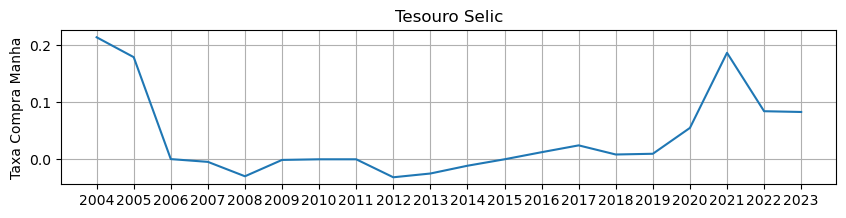

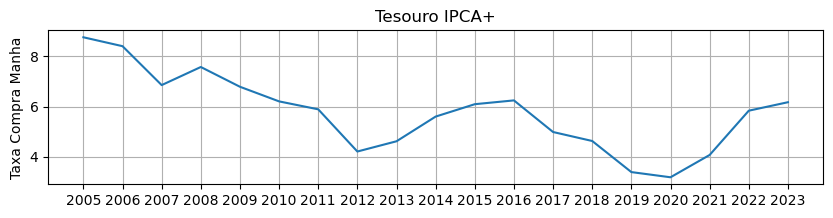

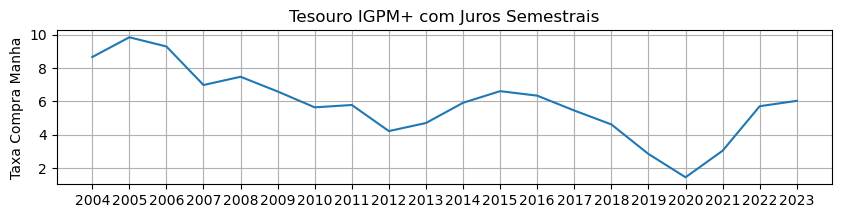

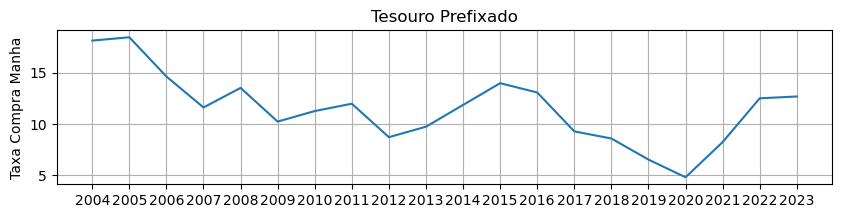

In [64]:
grafico_ano_base('Tesouro Selic', 'Taxa Compra Manha')
grafico_ano_base('Tesouro IPCA+', 'Taxa Compra Manha')
grafico_ano_base('Tesouro IGPM+ com Juros Semestrais', 'Taxa Compra Manha')
grafico_ano_base('Tesouro Prefixado', 'Taxa Compra Manha')


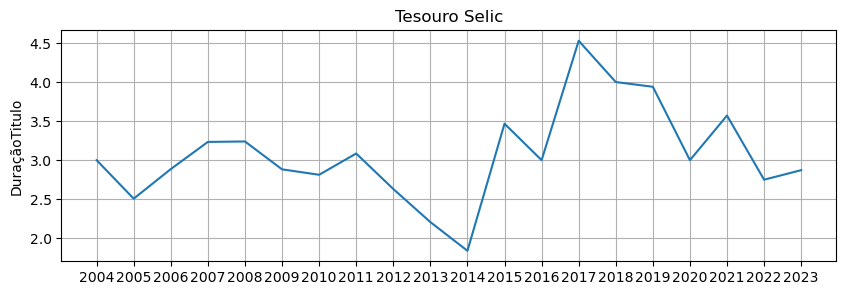

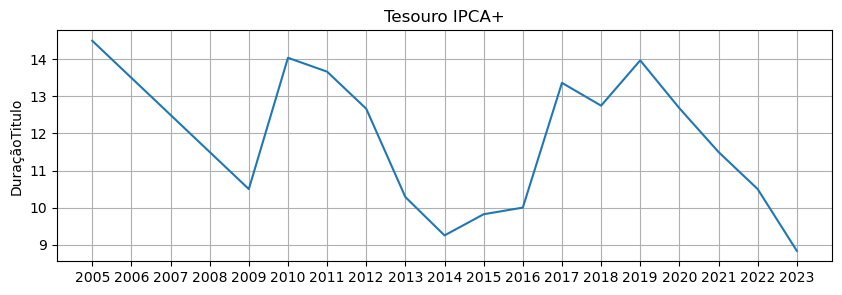

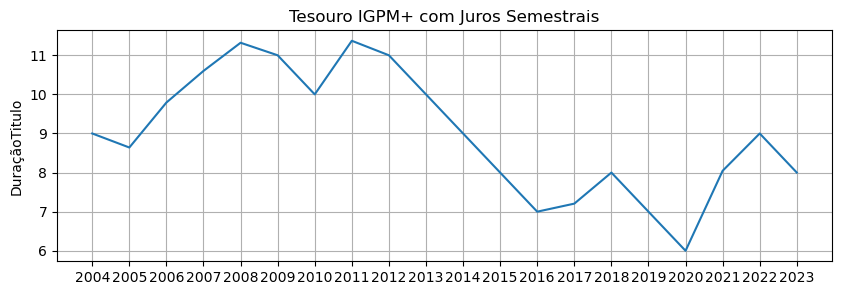

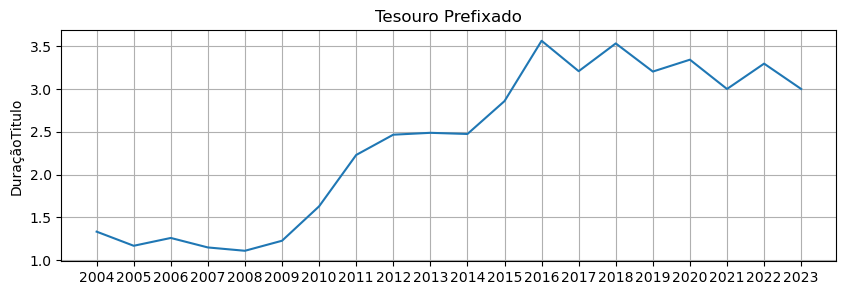

In [21]:
grafico('Tesouro Selic', 'DuraçãoTitulo', 'Ano Base')
grafico('Tesouro IPCA+', 'DuraçãoTitulo', 'Ano Base')
grafico('Tesouro IGPM+ com Juros Semestrais', 'DuraçãoTitulo', 'Ano Base')
grafico('Tesouro Prefixado', 'DuraçãoTitulo', 'Ano Base'
        )

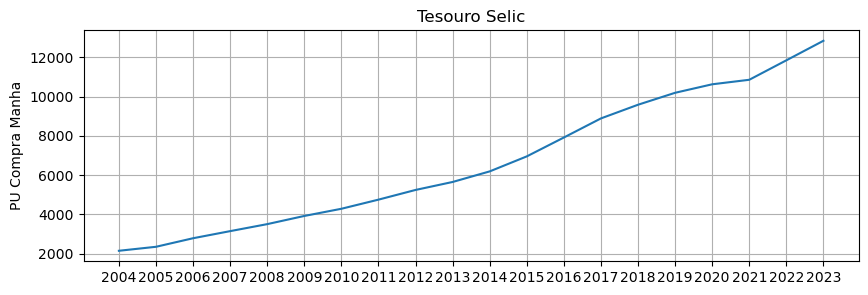

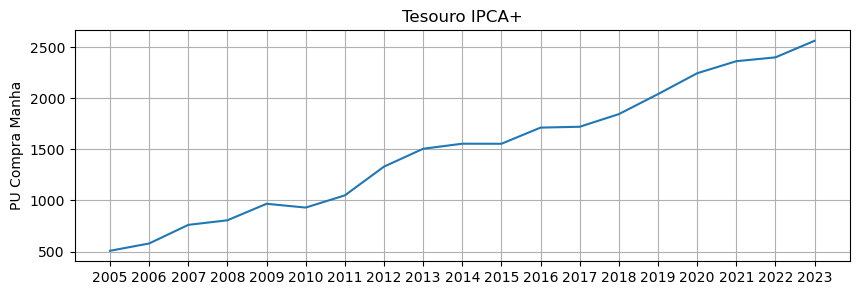

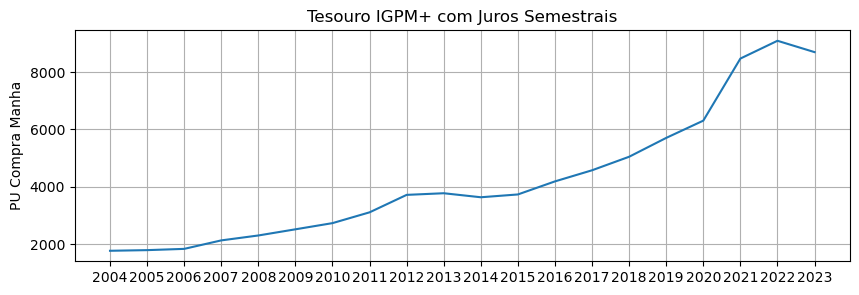

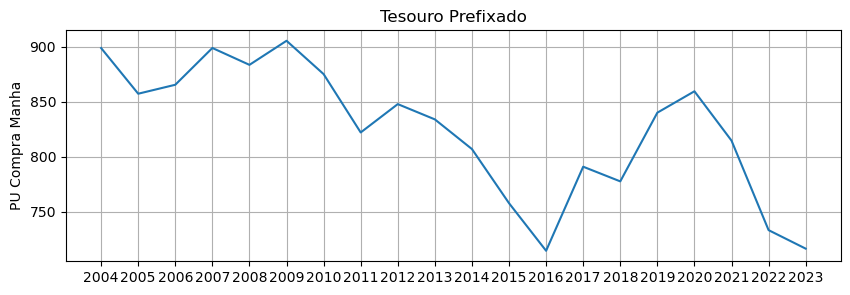

In [22]:
grafico('Tesouro Selic', 'PU Compra Manha', 'Ano Base')
grafico('Tesouro IPCA+', 'PU Compra Manha', 'Ano Base')
grafico('Tesouro IGPM+ com Juros Semestrais', 'PU Compra Manha', 'Ano Base')
grafico('Tesouro Prefixado', 'PU Compra Manha', 'Ano Base')

In [23]:
data['Tipo Titulo'].unique()

array(['Tesouro IPCA+', 'Tesouro Prefixado',
       'Tesouro Prefixado com Juros Semestrais',
       'Tesouro IPCA+ com Juros Semestrais', 'Tesouro Selic',
       'Tesouro IGPM+ com Juros Semestrais',
       'Tesouro Renda+ Aposentadoria Extra'], dtype=object)

In [24]:
def histograma(Titulo, eixo_y):
    TituloSelic = data.loc[data['Tipo Titulo']== Titulo]
    TituloSelic[eixo_y].mean()


    fig,ax=plt.subplots(figsize=(12,5))
    ax.hist(TituloSelic[eixo_y])
    #plt.xticks(Taxa_compra[eixo_x])
    #plt.yticks(Taxa_compra['Taxa Venda Manha'])
    plt.grid()
    plt.title(Titulo)
    plt.xlabel(eixo_y)
    plt.show()

In [25]:
(str((data['Data Vencimento']-data['Data Base'])/365))[0:1]

'0'

In [46]:
data.head(1)

,Tipo Titulo,Data Vencimento,Data Base,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha,Ano Base,Ano Vencimento,Mes_ano Base,Mes_ano Vencimento,DuraçãoTitulo,Mes Base,Mes Vencimento
0,Tesouro IPCA+,2024-08-15,2018-04-24,4.56,4.68,2318.97,2302.31,2301.68,2018,2024,2018-04,2024-08,6,4,8


In [52]:
def grafico2(Titulo, eixo_y, ano, mes):
    TituloSelect = data.loc[data['Tipo Titulo']== Titulo]
    TituloAno = TituloSelect.loc[TituloSelect['Ano Base']==ano]
    Taxa_compra = TituloAno[eixo_y].groupby(TituloAno[mes]).mean().reset_index()


    fig,ax=plt.subplots(figsize=(10,3))
    ax.plot(Taxa_compra[mes], Taxa_compra[eixo_y])
    plt.xticks(Taxa_compra[mes])
# plt.yticks(Taxa_compra['Taxa Venda Manha'])
    plt.grid()
    plt.title(Titulo)
    plt.ylabel(eixo_y)
    plt.show()

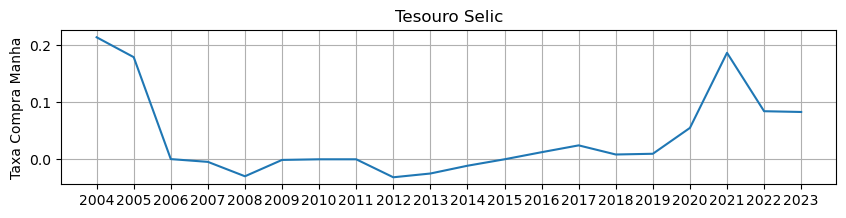

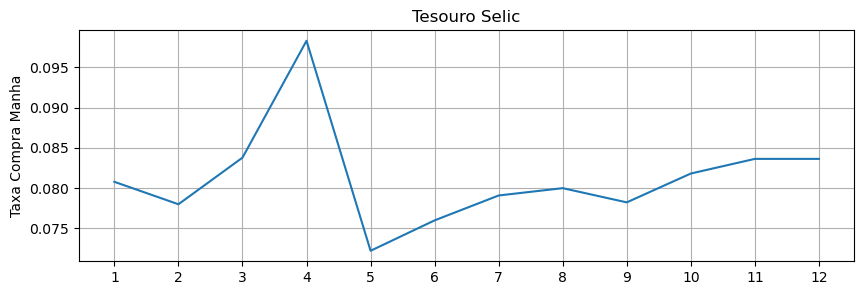

In [70]:
grafico_ano_base('Tesouro Selic', 'Taxa Compra Manha')
grafico2('Tesouro Selic', 'Taxa Compra Manha', 2023, 'Mes Base')